# Predicting Terrorism in the Middle East 

## Contributors: 
- [Deangelo Bowen](https://github.com/DeangeloBowen1)
- [Cody Clonts](https://github.com/codyclonts)
- [Fred Lindsey](https://github.com/fred-lindsey)

_Link to contributors github(s)_

---

# Project Overview:


This project takes an in depth look at terrorism in Middle Eastern countries and how it has evolved since 2001. In this project, my team and I analyze information from the Global Terrorism Database and build machine learning models to determine what groups are most at risk of being attacked in the Middle East, as well as attempt to accredit previously unattributed attacks.

# Executive Summary:


   In our data, we discovered that terrorist attacks in the Middle East increased between 2001 and 2014, utilizing bombing and explosive attacks followed by armed assault, hostage taking, and assassinations. The areas of most attacks were Iraq, Afghanistan, and Pakistan with most active terrorist groups between 2001 and 2017 being ISIL, Al-Qaida, and the Taliban. Finally we discovered the primary targets of these attacks who were the police, the military, private citizens/property, and general government organizations/facilities.

   Finally, we created an array of ML Classification models that predicted who's at risk with 47% accuracy, beating baseline by 75%. Also we predicted the perpetrators of unattributed and unknown attacks at 94% accuracy out performing baseline by over 2.5 times.

# Project Key Takeaways:
- Terrorist attacks have increased in frequency from 2001- 2014, with a sharp increase occuring from 2011 - 2014. After 2014, there began to be a decline in frequency. 
- The most active terrorist groups are ISIL, Al-Qaida, and the Taliban. 
- Iraq has had the most active terrorist attacks with over 1600 attacks in 2017 alone, followed by Afghanistan with 862 attacks, and Pakistan with 504 attacks. 
- The most targeted groups of people were the police, the military, private citizens/property, and general government. 
    - Most, if not all, terrorist groups targeted these groups of people in some way. 
- The most prominent type of attacks have been bombing and explosive attacks, followed by armed assault, hostage taking, and assassinations. 
    - Historically, bombings resulted in the largest amount of wounded people by a large margin. Second to bombing, unarmed assault would be the leading cause of wounded individuals. 

---

## Imports

In [1]:
# numpy and pandas imports
import pandas as pd
import numpy as np
import os

# imports for plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# stats imports
from scipy import stats

# utilities
import warnings
warnings.filterwarnings("ignore")

# python functions imports
import wrangle as w
import explore as e
import acquire as a
import model as m
import utilities

# Acquire and Prepare
- Data was acquired from local csv, which was downloaded from Kaggle
- Initial csv contained information on terrorist attacks throughout the world from 1970 to 2017.
- Limited scope to attacks from 2001 - 2017 in Middle Eastern countries
- Nulls were dropped from the dataframe
- Renamed columns/ lower cased entire df for uniformity and ease of use. 

In [2]:
# acquire the data and prepare it
df= w.create_terrorism_df()
df.head()

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,success,suicide,attack_type,target,targ_desc,targeted_group,tg_desc,nationality,atk_group,claimed,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property
0,200101010004,2001,1,1,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,1,0,bombing/explosion,private citizens & property,"procession/gathering (funeral, wedding, birthday, religious)",civilians,civilians celebrating the new year,turkey,unknown,0.0,explosives,pipe bomb,0.0,0.0,0.0,10.0,0.0,0.0,1
1,200101030001,2001,1,3,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,1,1,bombing/explosion,police,"police building (headquarters, station, school)",istanbul police,istanbul police station,turkey,devrimici halk kurtulus cephesi (dhkp/c),0.0,explosives,suicide (carried bodily by human being),3.0,0.0,1.0,7.0,0.0,0.0,1
3,200101070003,2001,1,7,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,1,0,armed assault,police,police patrol (including vehicles and convoys),istanbul police,istanbul police vehicle,turkey,devrimici halk kurtulus cephesi (dhkp/c),0.0,firearms,unknown gun type,0.0,0.0,0.0,1.0,0.0,0.0,1
6,200101080002,2001,1,8,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,1,0,armed assault,educational institution,teacher/professor/instructor,marmara university school of theology,dr. zekeriya beyaz,turkey,great eastern islamic raiders front (ibda-c),-9.0,melee,knife or other sharp object,0.0,0.0,0.0,1.0,0.0,0.0,0
7,200101100004,2001,1,10,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,1,0,armed assault,police,police security forces/officers,turkish police,"police in istanbul, turkey",turkey,unknown,-9.0,firearms,unknown gun type,1.0,0.0,0.0,1.0,0.0,0.0,1


## A quick look at how terrorism has changed throughout the years

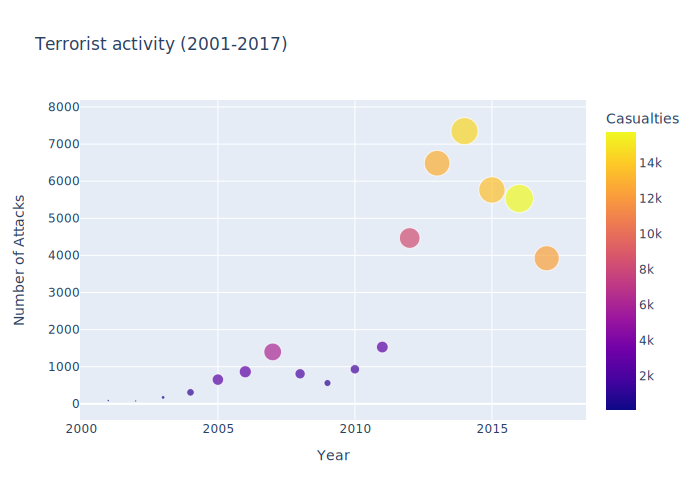

In [3]:
# create a histogram of the number of attacks by year
perp_df = w.get_perpetrator_df()
e.terror_rate(perp_df)

- A quick visualization shows us that the number of attacks increased drastically from 2011 to 2014, but after 2014 the number of attacks sharply declines.

# Exploration

In [4]:
# split the data into train, validate, and test subsets. 
train, validate, test = w.split_data(df)

## Which terrorist groups are responsible for the most attacks? 

In [5]:
# first get a look at the top terrorist groups
df_top_groups = utilities.top_groups(train)
df_top_groups.atk_group.value_counts().head(5)

unknown                                        15419
taliban                                         2687
islamic state of iraq and the levant (isil)     2117
al-shabaab                                       864
kurdistan workers' party (pkk)                   534
Name: atk_group, dtype: int64

### Takeaways:
- Here we see that a large number of attacks aren't attributed to any particular terrorist group. We will seek to answer this who was behind these attacks as part of our machine learning portion. After that, the most active terrorist groups are the Taliban, ISIL, and Al-Shabaab

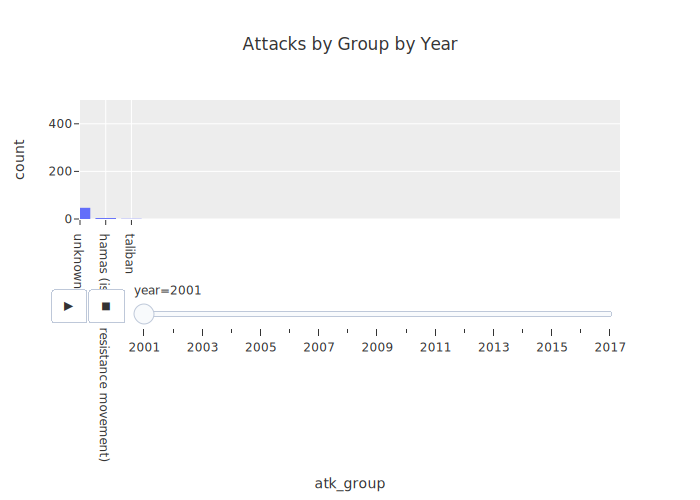

In [6]:
# create a histogram between the number of attacks from each group by year
utilities.attacks_by_group_by_year(train)

### Takeaways:
- Terrorist attacks were hardly claimed until about 2012, at which point terrorist groups began to claim responsibility. This could be do to the rise of terrorist groups like ISIL (ISIS), or terrorist groups claiming respoinsibility for attacks they didn't actually launch. Claiming attacks drastically increased around the year 2015, in particular for major groups like ISIL and the Taliban.

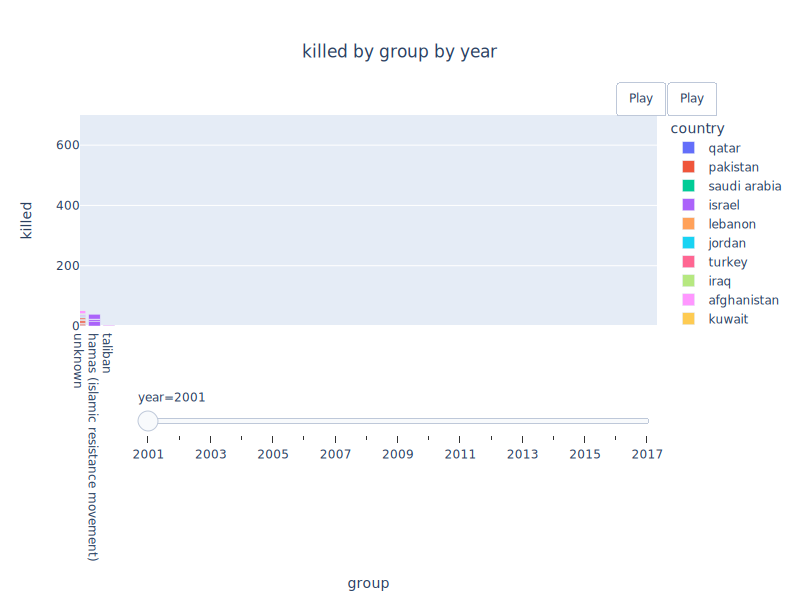

In [7]:
# create a bar chart that shows how many people were killed by group by year
# hue of country to show what country the groups are active in
utilities.killed_by_group_by_year(train)

- This gives us a better representation of what groups are the most active and in what countries they are active in

### Takeaways: 
- The terrorist groups that are the most active are ISIL, Al-qaida, and the Taliban. A majority of terrorist attacks remain unclaimed.

### For future reference, we will create 2 dictionaries. One that divides the data by the different terrorist groups and one that divides the data according to the different countries. 

In [8]:
# create a dictionary for the different terrorist groups. 
terrorist_dict = {}
terrorists = train.atk_group.unique()
for terrorist in terrorists: 
    terrorist_dict[terrorist] = train[train.atk_group == terrorist]
    terrorist_dict[terrorist] = terrorist_dict[terrorist].sort_values('year')
    
# ensure that the terrorist group dictionary works properly
terrorist_dict['taliban'].head(1)

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,success,suicide,attack_type,target,targ_desc,targeted_group,tg_desc,nationality,atk_group,claimed,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property
159,200109100001,2001,9,10,afghanistan,south asia,takhar,khodja baha ud din,37.340225,69.536949,1,1,bombing/explosion,government (general),politician or political party movement/meeting/rally,afghanistan opposition,"ahmed shah masood, afghanistan opposition leader",afghanistan,taliban,0.0,explosives,suicide (carried bodily by human being),3.0,0.0,2.0,1.0,0.0,0.0,0


In [9]:
# create a dictionary of the different countries
country_dict = {}
countries = train.country.unique()
for country in countries: 
    country_dict[country] = train[train.country == country]
    country_dict[country] = country_dict[country].sort_values('year')
    
# ensure that the dictionary works properly    
country_dict['iraq'].head(1)

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,success,suicide,attack_type,target,targ_desc,targeted_group,tg_desc,nationality,atk_group,claimed,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property
106,200107110002,2001,7,11,iraq,middle east & north africa,baghdad,baghdad,33.303566,44.371773,1,0,bombing/explosion,private citizens & property,house/apartment/residence,private citizens and property in baghdad,a residential area of baghdad,iraq,supreme council for islamic revolution in iraq (sciri),1.0,explosives,"projectile (rockets, mortars, rpgs, etc.)",0.0,0.0,0.0,1.0,0.0,0.0,1


## What countries are these groups the most active in?

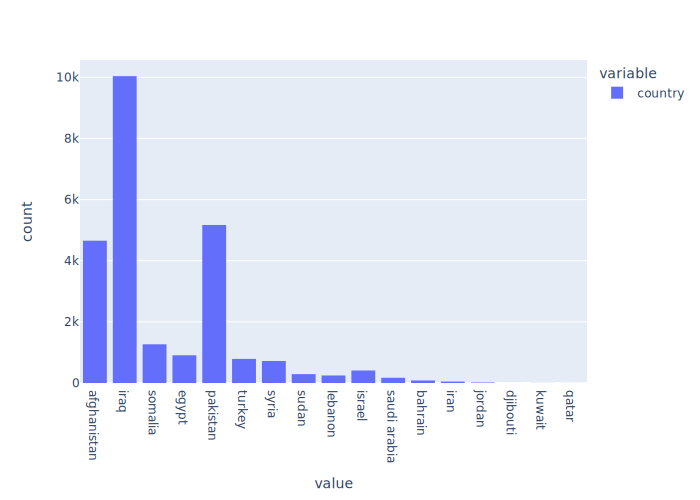

In [10]:
utilities.country_attack_graph(train)

- Here, it can be seen that Iraq, afghanistan, somalia, egypt, and pakistan have the most attacks. 

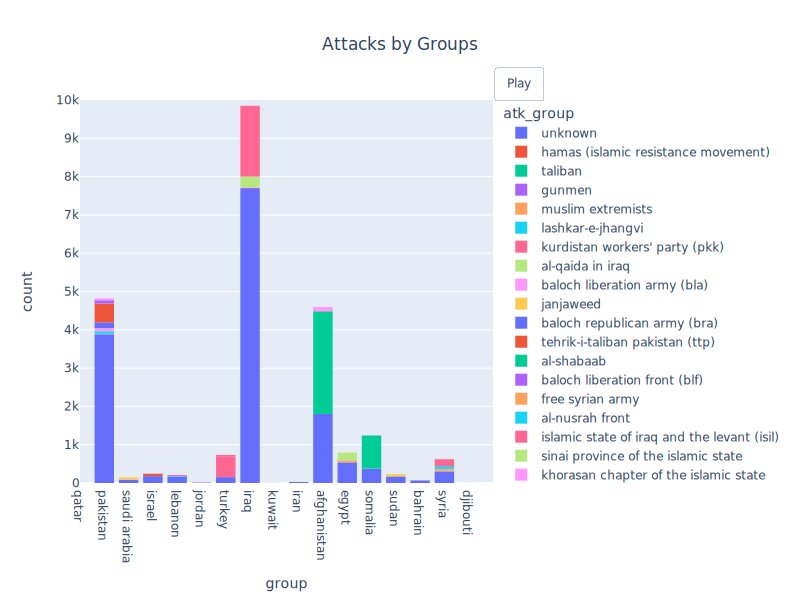

In [11]:
utilities.groups_by_country(train)

- This gives us a better look at just how many attacks are unattributed, as well as what groups are responsible for the most attacks in various countries in the Middle East. 
- ISIL is responsible for numerous attacks throughout multiple countries. 
- The Taliban launched over 2600 attacks in Afghanistan alone. 
- Al-Shabaab was responsible for over 850 attacks in Somalia. 
- The TTP claimed responsibility for more attacks than any oter group in Pakistan. 

### Is there a relationship between what country is being attacked and the terrorist groups? 

- Null Hypothesis: There is no relationship between the country that the attacks are occuring in and the groups that are attacking.
- Alternative Hypothesis: There is a relationship between the country that the attacks are occuring in and the groups that are attacking.

In [12]:
# Run a chi2 test to see if there is a relationship between country and terrorist group.
# If the p value is less than the alpha value, there is a relationship. 
utilities.country_group_test(train)

alpha = 0.05
p = 0.0
Reject the null


### Takeaway:
- There is a strong relationship between the terrorist groups and the countries. 

## What groups of people are the most targeted by terrorist groups?

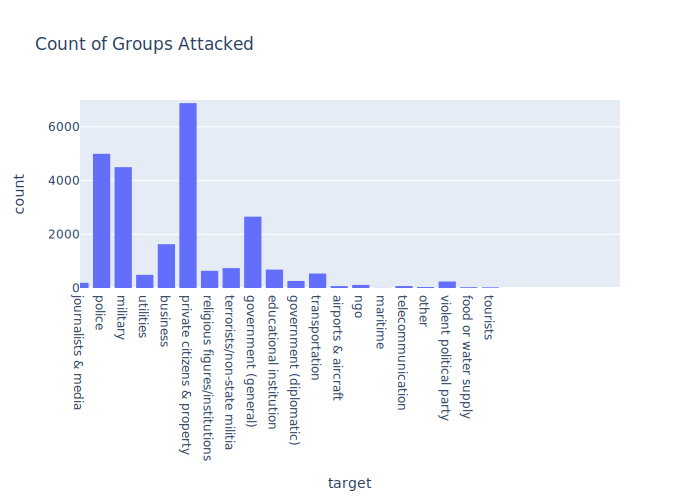

In [13]:
# First, lets get a look at the groups being attacked overall. 
utilities.overall_attack_graph(train)

- At first glance, it looks like private citizens and property are the most targeted, followed by the police, military, and then the general government.

#### - Lets take a look at the top 5 most attacked countries to see if there are any outliers of groups being attacked

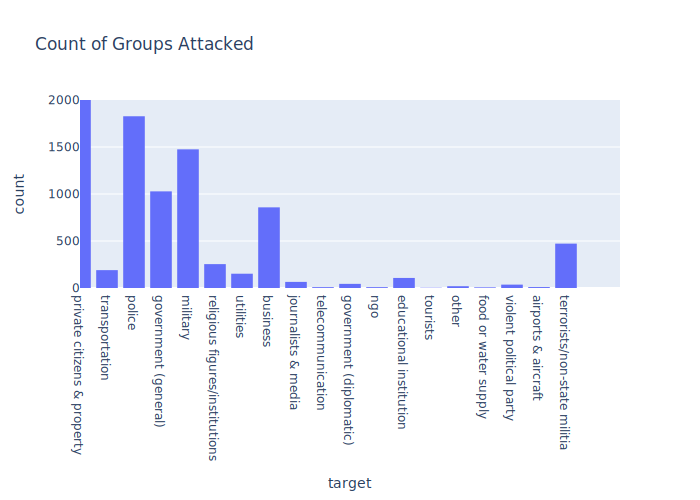

In [14]:
# count of groups attacked in iraq
utilities.attack_graph(country_dict['iraq'])

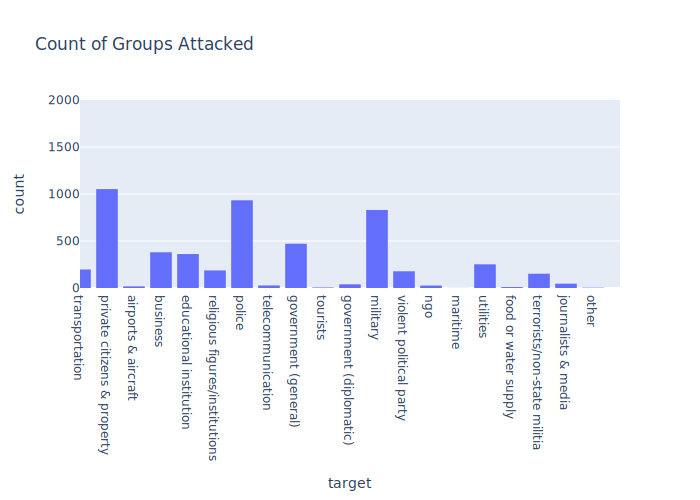

In [15]:
# count of groups attacked in pakistan 
utilities.attack_graph(country_dict['pakistan'])

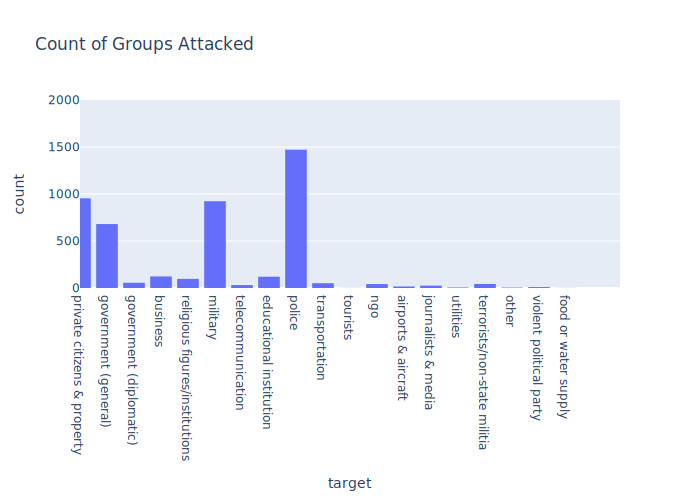

In [16]:
# count of groups attacked in afghanistan
utilities.attack_graph(country_dict['afghanistan'])

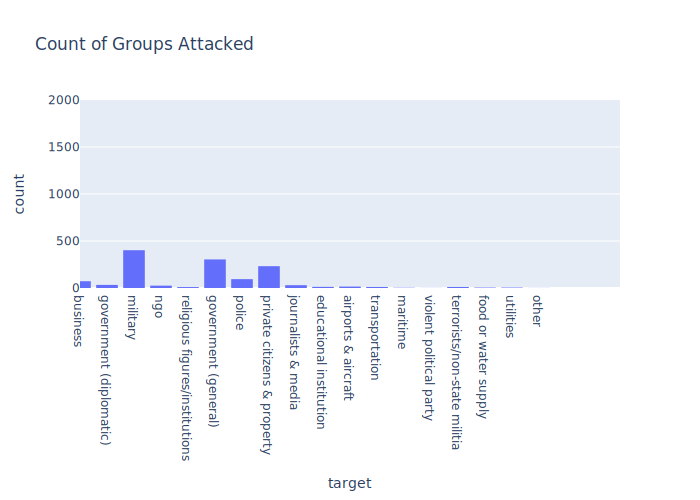

In [17]:
# count of groups attacked in somalia
utilities.attack_graph(country_dict['somalia'])

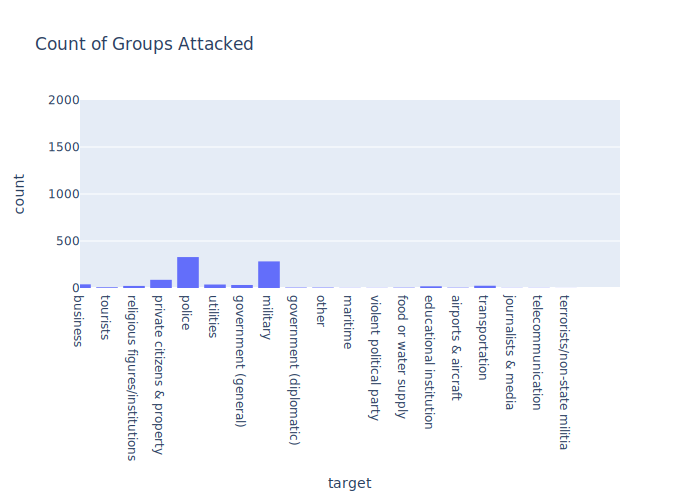

In [18]:
# count of groups attacked in egypt
utilities.attack_graph(country_dict['egypt'])

- There do not seem to be any major outliers, leaving the top most targeted groups being:
    - Police, military, private citizens and property, and the general government

### Verify there is a statistical relationship between the groups that are attacking and the groups that are being attacked.

- Null Hypothesis: There is no relationship between the groups that are being attacked and the terrorist groups.
- Alternative Hypothesis: There is a relationship between the groups that are being attacked and the terrorist groups.

In [19]:
# chi2 test to verify the relationship between the groups. 
utilities.target_terrorist_relationship_test(train)

alpha = 0.05
p = 0.0
Reject the null


### Takeaway: 
- There is a statistical relationship between the groups being targeted and the terrorist groups.

## What weapons are being the most used? What weapons are the most effective?

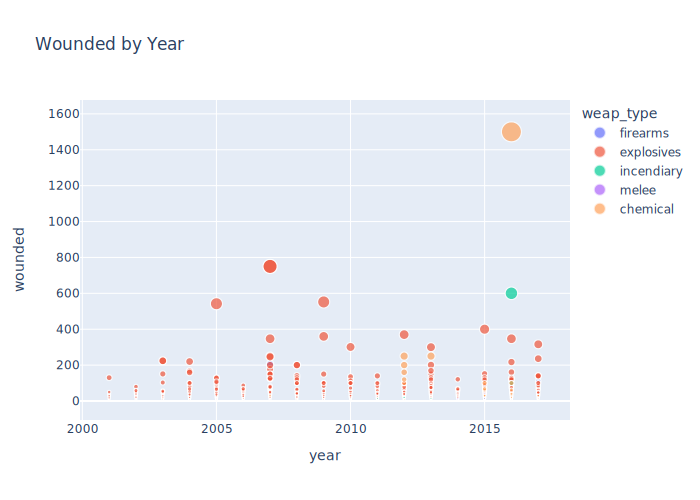

In [20]:
utilities.wounded_by_year(train)

- Takeaway: explosives tend to cause the most wounds on average, but there are outliers of attacks that caused major wounds such as a chemical attack that wounded 1500 and an incendiary attack that wounded 600

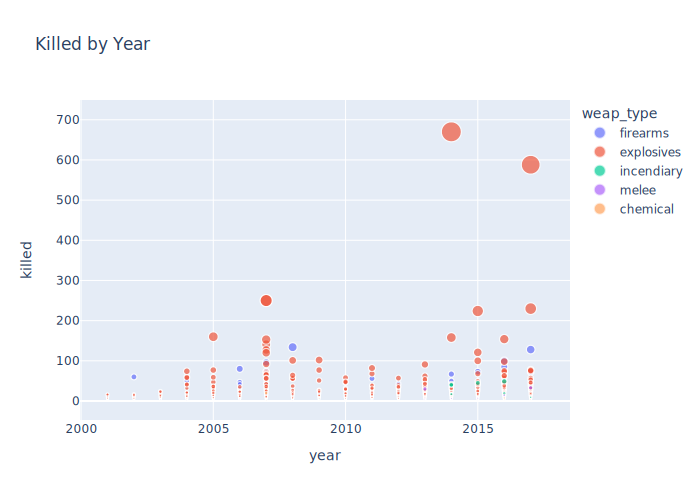

In [21]:
utilities.killed_by_year(train)

### Takeaway: 
- Explosives seem to cause the most deaths by far, followed by firearms

- Null Hypothesis: There is no relationship between the weapons that are being used and the terrorist groups.
- Alternative Hypothesis: There is a relationship between the weapons that are being used and the terrorist groups.

In [22]:
# run a chi2 test to see if there is a relationship between the weapons used and the terrorist groups
utilities.weapon_terrorist_relationship_test(train)

alpha = 0.05
p = 0.0
Reject the null


## When are attacks occuring the most? Does it change by week? Does it change by month?

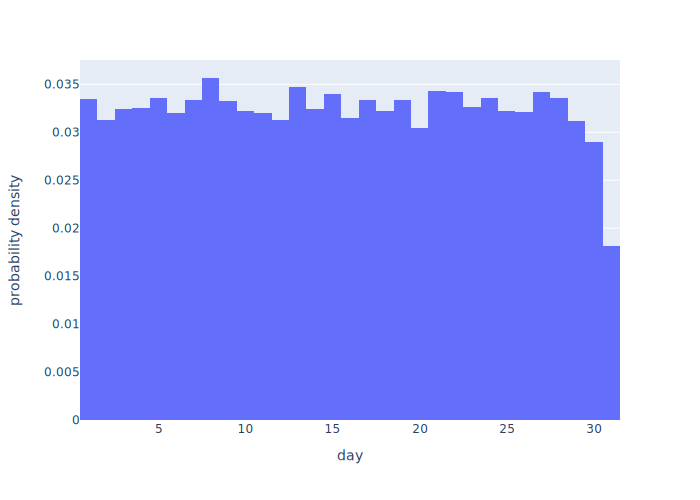

In [23]:
e.get_attack_day_proba(perp_df)

### Takeaways:
- There doesn't seem to be any significance in days and the probability of being attacked

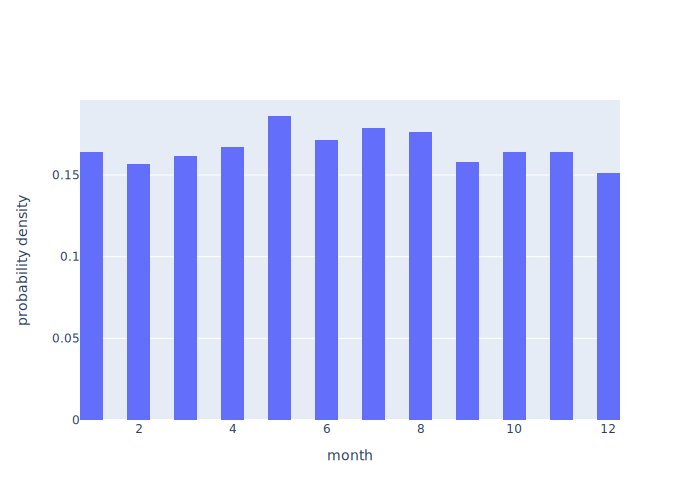

In [24]:
e.get_attack_months(perp_df)

### Perform an Anova statistical test to see if there is a relationship between the month and how many people were killed. 

In [25]:
# one-way anova test 
# null hypothesis - there is no relationship between the month and how many people were killed
# alt hypothesis - There is a relationship between the month and number killed. 

alpha = 0.05
F, p = stats.f_oneway(train.month, train.killed)
F, p
if p < alpha:
    print('p = ', p, 'There is a relationship between the two variables')
else:
    print('There is no relationship between the two variables')

p =  0.0 There is a relationship between the two variables


### Takeaways:
- There does seem to be a relationship between when attacks happen, how often they occure, and how many people are being killed. On average, it is less probable to be attacked in December than in February. 

---

### Exploration Summary:

Increasing over the years, Iraq has had the most active terrorist attacks with over 1600 attacks in 2017 followed by 862 attacks in Afghanistan and 504 in Pakistan
&nbsp;

A large number of attacks aren't attributed to any particular terrorist group. We will seek to answer this who was behind these attacks as part of our machine learning portion. After that, the most active terrorist groups are the Taliban, ISIL, and Al-Shabaab

Historically bombings have results in the largest amount of people wounded by a large margin.
Second to Bombing, unarmed assault would be a leading cause of wounded individuals.
&nbsp;

Bombing/Explosions are the general type of attack across all groups in the middle east.
Second to bombing across all groups would be armed assault,
followed by hostage taking and assassinations.
&nbsp;

Type of attacks seem to be normally distributed, and on the cusp of uniform distribution, when observing them by month. Type of attacks are also relatively normally distributed, which is similar to the probability of attacks. 
&nbsp;

Each group that has a significant amount of attacks commit the same type of crimes, although amount may vary due to activity. It can't be said that there is signifigant evidence of one group committing a particular crime only. 
&nbsp;

Terrorist attacks have increased over the years of 2001-2013, however there is a point of degression in attacks after 2014. 

Terrorist attacks were hardly claimed until about 2012, at which point terrorist groups began to claim responsibility. This could be do to the rise of terrorist groups like ISIL (ISIS), or terrorist groups claiming respoinsibility for attacks they didn't actually launch. Claiming attacks drastically increased around the year 2015, in particular for major groups like ISIL and the Taliban.

---

# Modeling:

### Predicting Targeted Groups
- Before we start predicting what groups are most likely to be targeted, it is important to note that a lot of the targeted groups are being:
    - targeted by the same terrorist organizations
    - attacked by the same kinds of weapons
    - attacked in the same general areas (such as country, city, provstate)
    - attacked at similar times
- This is bound to lead to misidentification by the machine learning model, but there is a lot of room for improvement upon baseline. 

In [26]:
# My baseline is going to be 27% since we are trying to predict the most targeted group. 
# If we predict that the private citizens & property, we are right 28% of the time
baseline = round((6883/len(train.target))*100,2)
print ('The baseline accuracy is', baseline, '%')


The baseline accuracy is 27.74 %


In [27]:
# create dummy variables for the train, validate, and test
encoded_train, encoded_validate, encoded_test = utilities.model_data()

In [28]:
# Split into X/y train, validate, and split
X_train = encoded_train.drop(columns=["target"])
y_train = encoded_train.target

X_validate = encoded_validate.drop(columns=["target"])
y_validate = encoded_validate.target

X_test = encoded_test.drop(columns=["target"])
y_test = encoded_test.target

In [29]:
# after running a few different trials, we found that a random forest model with a max_depth of 18 gave us the best results. 
final_metrics = []
tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=18,
                                  random_state=17)


tree = tree.fit(X_train, y_train)


in_sample_accuracy = tree.score(X_train, y_train)
    
out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
test_accuracy = tree.score(X_test, y_test)
    
output = {
        "max_depth": 18,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        "test_accuracy": test_accuracy
    }
    
final_metrics.append(output)
    
rf_df = pd.DataFrame(final_metrics)
rf_df

,max_depth,train_accuracy,validate_accuracy,test_accuracy
0,18,0.524343,0.470334,0.476868


- A max depth of 18 gave us a 52% accuracy on train data, a 47% accuracy on validate data, and a 48% accuracy on test data. 

## Predicting Perpetrators:

A large number of Terrorist Attacks weren't attributed to any particular terrorist group. This covered about 63% of our data. 

We will seek to answer this who was behind these attacks. 

To start, we will create a dataframe that controls for features that can predict Attackers. The features controlled for are:

- group name
- number of fatal injuries
- city
- providence/state
- year
- country
- suicide (y/n)
- attack type
- target
- and weapon

#### Our target variable will be the group name as it is what we want to attribute to the unknown. 

In [30]:
df1, df2, df3 = m.create_model_df()
df1.head(1)

,year,country,provstate,city,suicide,attack_type,targtype,gname,weaptype,nkill
date,,,,,,,,,,
2001-04-04,2001,iraq,Dihok,Duhok,0,Bombing/Explosion,Government (General),Kurdistan Workers' Party (PKK),Explosives,7.0


#### Now, we must align the dataframes so that they can properly fit through the model to create accurate predictions

In [31]:
df1, df2 = m.loop_boop(df1,df2)

# scaling functions and columns to match
gnames1, nkills1 = m.scaling_func(df1)

# scaling functions and columns to match
gnames2, nkills2 = m.scaling_func(df2)

dummy_df = m.dummy_df(df1, gnames1, nkills1)

dummy_df2 = m.dummy_df(df2, gnames2, nkills2)

print('Our first dataframe size is:', dummy_df.shape)
print('Our second dataframe size is:',dummy_df2.shape)

10279 10279 10279
22259 22259 22259
(10279, 1276)
(22259, 1276)
Our first dataframe size is: (10279, 1276)
Our second dataframe size is: (22259, 1276)


### Now creating the Model :

We performed operations on a K-Nearest Neighbor and a Random Forest Model, however, they weren't productive making accurate predictions for our observation. Our best model was the `Decision Tree Classifier Model with a Max Depth of 5.`

In [32]:
# split into train, validate, test
train1, validate1, test1 = m.train_validate_test_split(dummy_df, target='gname', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train1= train1.drop(columns=['gname'])
y_train1 = train1.gname

X_validate1 = validate1.drop(columns=['gname'])
y_validate1 = validate1.gname

X_test1 = test1.drop(columns=['gname'])
y_test1 = test1.gname

In [42]:
# My baseline is going to be 27% since we are trying to predict the most targeted group. 
# If we predict that the private citizens & property, we are right 28% of the time
baseline1 = round((len(train1.gname))/100,2)
print ('The baseline accuracy is', baseline1, '%')

The baseline accuracy is 48.76 %


In [33]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# model.fit(X, y)

clf = clf.fit(X_train1, y_train1)

# make prediction on train obeservations

y_pred = clf.predict(X_train1)

# y_pred_proba = clf.predict_proba(X_train2)

# Eval model
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train1, y_train1)))

Accuracy of Decision Tree classifier on training set: 0.94


## In-Sample Accuracy: 94% 

#### Now, we will test the model on out-of-sample test data.

In [34]:
tree = DecisionTreeClassifier(max_depth=5, random_state=123)

tree = tree.fit(X_train1, y_train1)

tree.score(X_test1, y_test1)

0.9340778097982709

## Out-of-sample Test Data: 93.4%

---

### Our Decision Tree:

<Figure size 1800x1080 with 0 Axes>

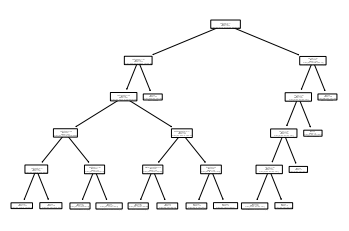

<Figure size 1800x1080 with 0 Axes>

In [35]:
plot_tree(clf, feature_names=X_train1.columns, class_names=clf.classes_, rounded=True)
plt.figure(figsize=(25, 15))

---

## With a Decision Tree Classifier:
#### And a Max Depth of 5:
- We were able to create a model that performed with 94% accuracy on in-sample trained data, and 93% accuracy on out-of-sample test data.

---

# Conclusions:

We were able to maneuver through 2001 and 2017 terrorism data to find out:
- Who was most at rist of terrorist attacks
- Who were the most likely perpetrators of the unattributed attacks

by controlling for features of terror attacks in the Middle East that would aid in prediction. 

To do this, we created an array of Machine Learning models which ultimately lead to the Decision Tree Classifier and Random Forest yielding the best results. 

In regards to finding "Who were most at risk of terrorist attacks" and the Random Forest Model we achieved:
- 52% Accuracy on Training In-Sample Data
- 47% Accuracy on Test Out-of-Sample Data

As for the finding "Who were most likely the perpetrators of unattributed attacks, we achieved:
- 94% Accuracy on Training In-Sample Data
- 93% Accuracy on Test Out-of-Sample Data

## Our Next Steps:
We find benefit in fitting more terrorist groups in our model for discovering the perpetrators of unattributed attacks as, while generally accurate, could use the features for better decision making and precision. 

Lastly, To take this project further, we would like to recreate the project on the scale of Global Terrorism. 

# End